# EDA, Aggregated Features

In [120]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

from itertools import cycle
from collections import Counter

import plotly.plotly as py
import plotly.graph_objs as go

import scipy.stats as stats


In [121]:
#available here: https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

In [122]:
train_final_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_final_data.csv', low_memory=False)
train_all_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_all_df.csv', low_memory=False)

In [123]:
train_final_data.head()

,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,County_0,County_1,County_10,County_100,County_11,County_110,County_111,County_113,County_117,County_120,County_130,County_131,County_14,County_140,County_141,County_150,County_160,County_161,County_170,County_180,County_190,County_191,County_194,County_20,County_200,County_210,County_211,County_212,County_213,County_220,County_221,County_222,County_223,County_224,County_230,County_240,County_241,County_25,County_250,County_251,County_260,County_270,County_271,County_280,County_281,County_288,County_290,County_291,County_292,County_30,County_300,County_301,County_310,County_311,County_312,County_320,County_321,County_328,County_330,County_331,County_34,County_340,County_341,County_342,County_343,County_350,County_360,County_361,County_362,County_370,County_380,County_381,County_390,County_391,County_392,County_40,County_400,County_410,County_411,County_412,County_420,County_421,County_430,County_431,County_440,County_441,County_450,County_451,County_460,County_461,County_462,County_470,County_471,County_480,County_490,County_50,County_500,County_510,County_511,County_520,County_521,County_522,County_530,County_531,County_540,County_541,County_542,County_55,County_550,County_551,County_552,County_560,County_561,County_562,County_563,County_564,County_570,County_580,County_581,County_582,County_583,County_590,County_591,County_592,County_60,County_600,County_601,County_610,County_611,County_612,County_620,County_621,County_622,County_630,County_631,County_632,County_640,County_641,County_650,County_651,County_652,County_653,County_654,County_660,County_661,County_662,County_670,County_671,County_672,County_680,County_681,County_690,County_691,County_70,County_700,County_701,County_702,County_703,County_710,County_711,County_712,County_720,County_722,County_730,County_731,County_734,County_740,County_741,County_742,County_743,County_744,County_750,County_751,County_752,County_753,County_754,County_755,County_756,County_757,County_758,County_760,County_761,County_770,County_771,County_772,County_780,County_782,County_783,County_784,County_785,County_790,County_791,County_792,County_793,County_794,County_795,County_796,County_797,County_80,County_800,County_801,County_802,County_803,County_804,County_810,County_811,County_812,County_820,County_821,County_822,County_830,County_831,County_832,County_834,County_835,County_838,County_84,County_840,County_841,County_842,County_843,County_844,County_845,County_850,County_851,County_860,County_861,County_862,County_867,County_870,County_871,County_873,County_874,County_875,County_876,County_878,County_879,County_88,County_880,...,proc_864.0,proc_8659.0,proc_8666.0,proc_8667.0,proc_8669.0,proc_8670.0,proc_8674.0,proc_8675.0,proc_8683.0,proc_8689.0,proc_8693.0,proc_8694.0,proc_8698.0,proc_8703.0,proc_8708.0,proc_8721.0,proc_8722.0,proc_8724.0,proc_8737.0,proc_8741.0,proc_8744.0,proc_8749.0,proc_8751.0,proc_8753.0,proc_8754.0,proc_8761.0,proc_8769.0,proc_8773.0,proc_8774.0,proc_8775.0,proc_8777.0,proc_8778.0,proc_8801.0,proc_881.0,proc_8814.0,proc_8819.0,proc_8823.0,proc_8826.0,proc_8827.0,proc_8828.0,proc_8829.0,proc_8837.0,proc_8838.0,proc_8841.0,proc_8842.0,proc_8843.0,proc_8844.0,proc_8845.0,proc_8847.0,proc_8848.0,proc_8849.0,proc_8853.0,proc_8855.0,proc_8856.0,proc_8857.0,proc_8866.0,proc_8867.0,proc_8871.0,proc_8872.0,proc_8873.0,proc_8874.0,proc_8875.0,proc_8876.0,proc_8877.0,proc_8879.0,proc_8881.0,proc_889.0,proc_8891.0,proc_8893.0,proc_8894.0,proc_8897.0,proc_8903.0,proc_8904.0,proc_8905.0,proc_8909.0,proc_8914.0,proc_8915.0,proc_8919.0,proc_8921.0,proc_8922.0,proc_8929.0,proc_8937.0,proc_8938.0,proc_8939.0,proc_8941.0,proc_8944.0,proc_8945.0,proc_8949.0,proc_8951.0,proc_8952.0,proc_8954.0,proc_8959.0,proc_8961.0,proc_89

## All graphs below describe data at the provider level

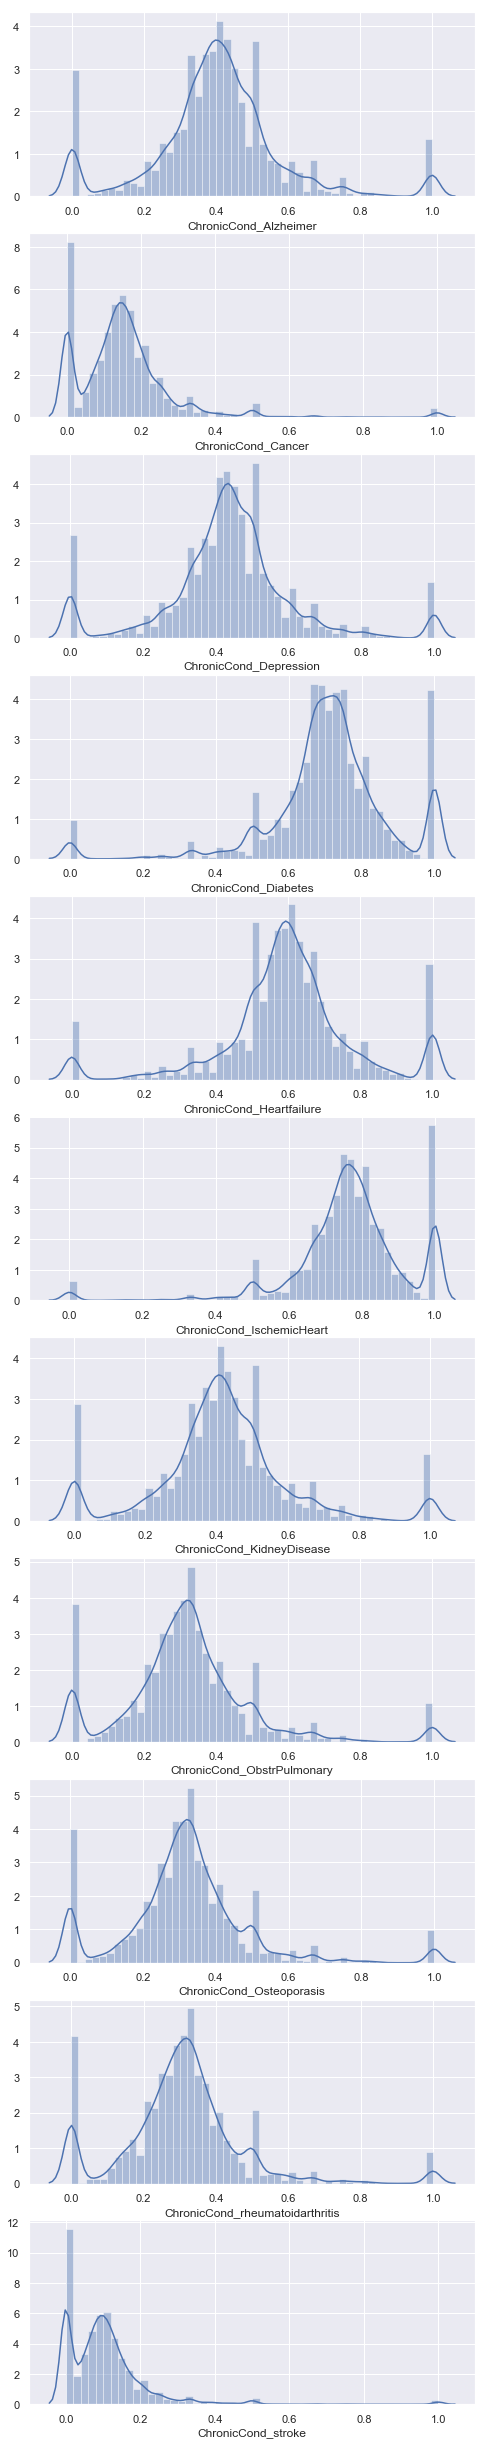

In [124]:
def distplot_loop(cols, df): 
    nums = list(range(len(cols)))
    tuples = list(zip(cols, nums))
    
    sns.set()
    fig, ax_ = plt.subplots(len(cols), 1, figsize=(8, 4*len(cols)))
    
    for col, i in tuples:
            graph_name = str(i)
            graph_name = sns.distplot(df[col], ax=ax_[i])
    plt.show()

    
cols = [col for col in train_final_data.columns if col.startswith('ChronicCond')]

distplot_loop(cols, train_final_data)

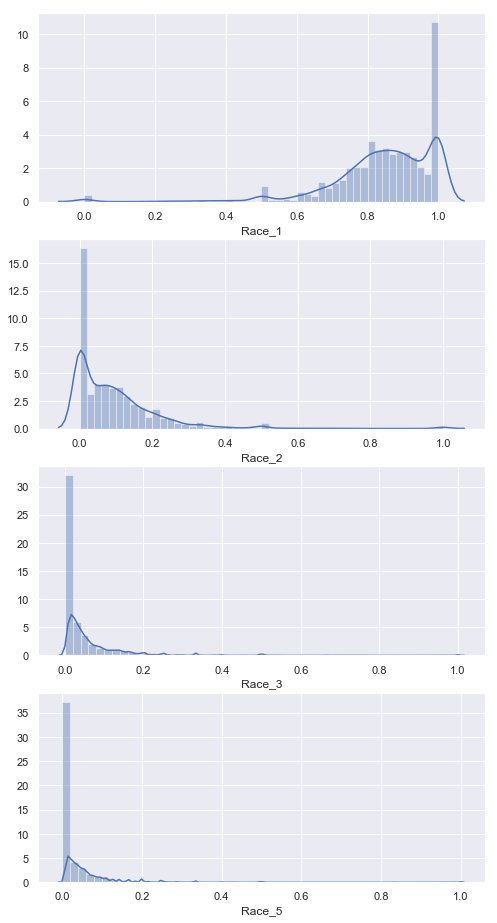

In [125]:
cols = [col for col in train_final_data.columns if col.startswith('Race')]

distplot_loop(cols, train_final_data)

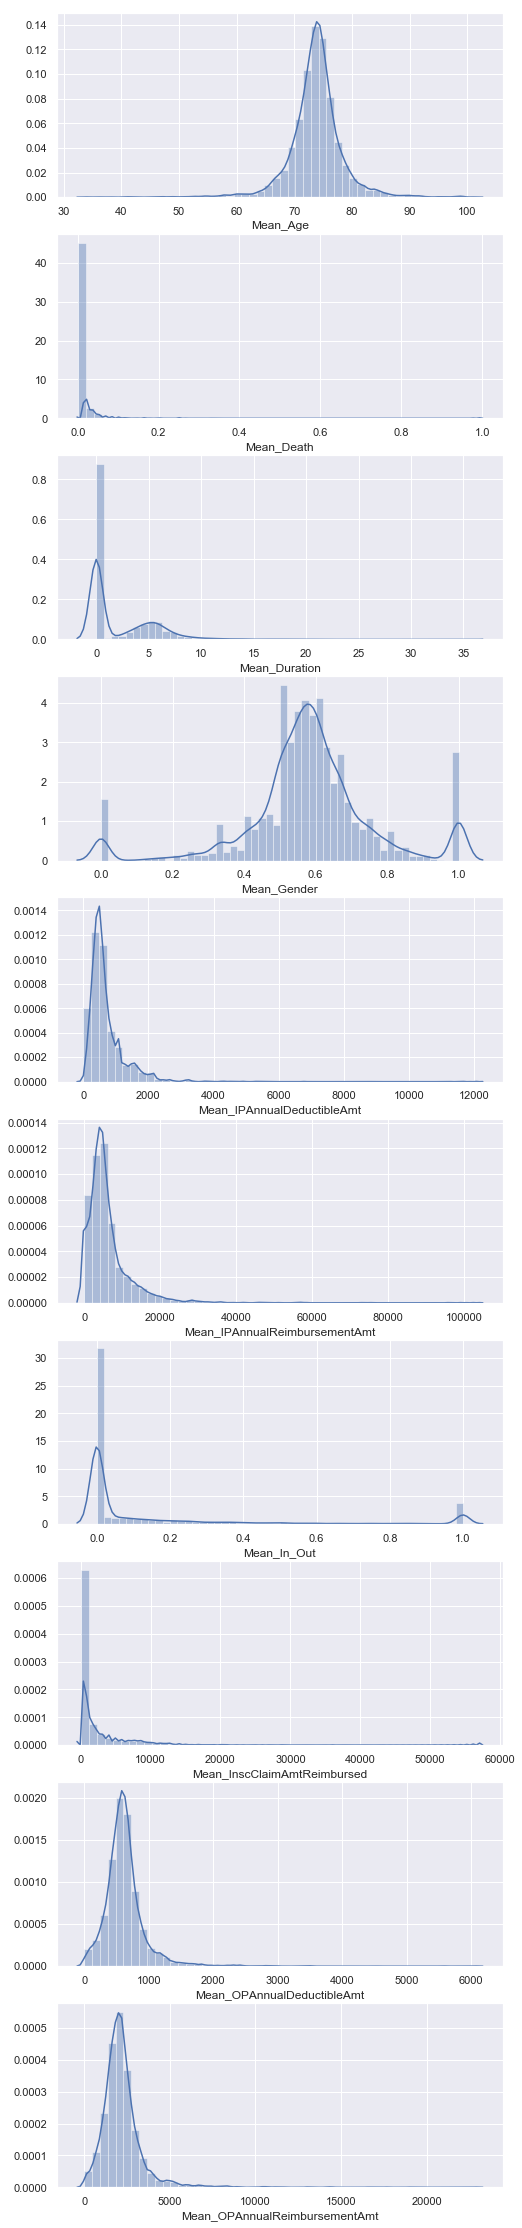

In [126]:
cols = [col for col in train_final_data.columns if col.startswith('Mean')]

distplot_loop(cols, train_final_data)

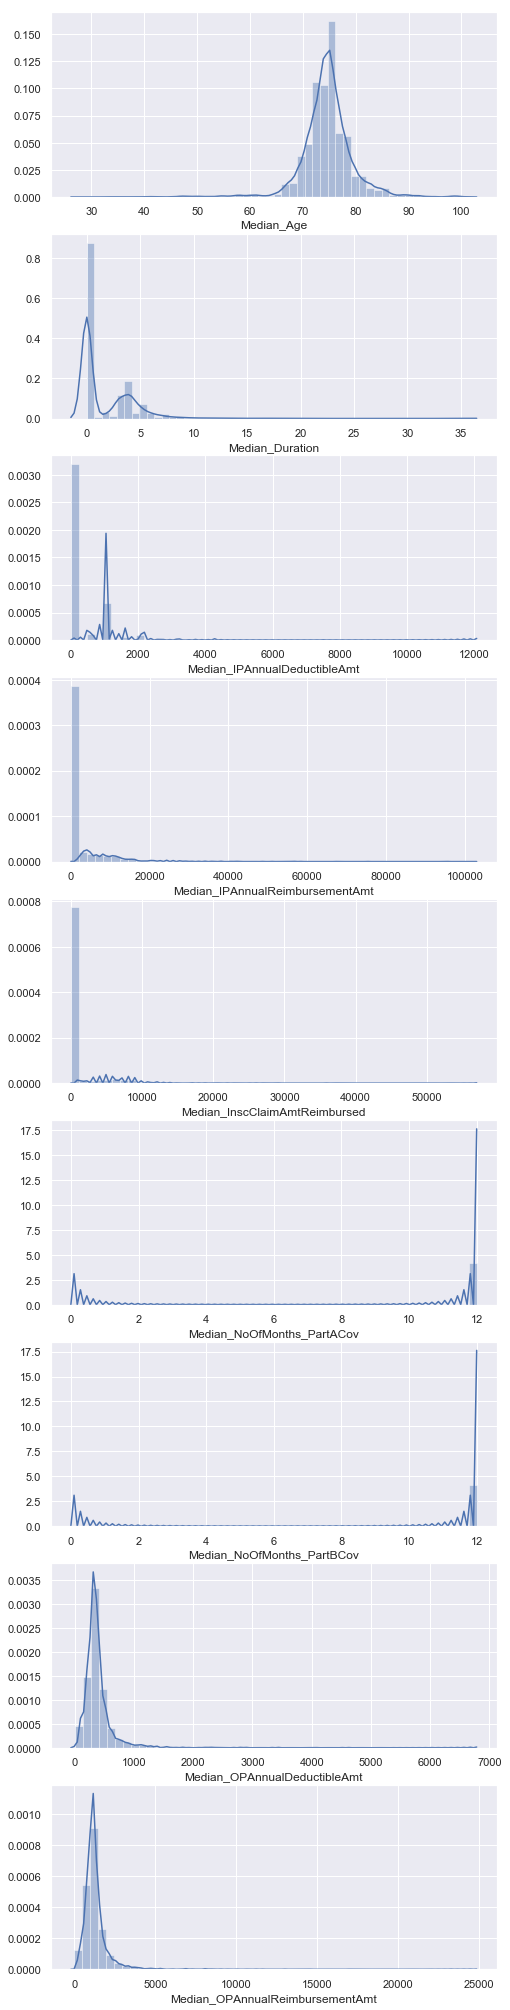

In [127]:
cols = [col for col in train_final_data.columns if col.startswith('Median')]

distplot_loop(cols, train_final_data)

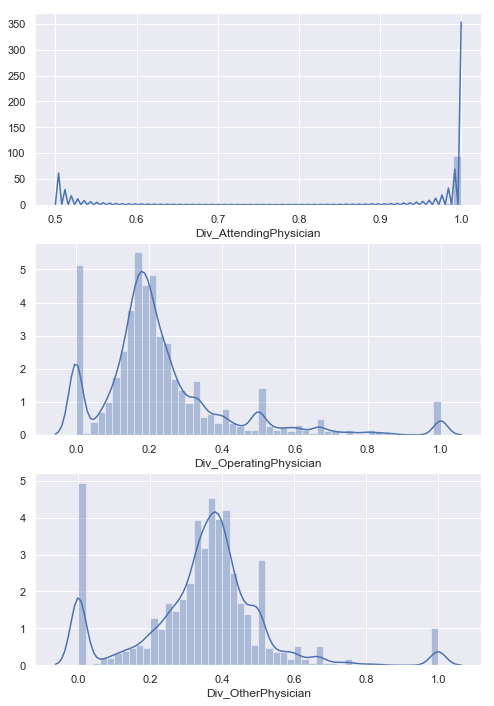

In [128]:
cols = [col for col in train_final_data.columns if col.startswith('Div')]

distplot_loop(cols, train_final_data)

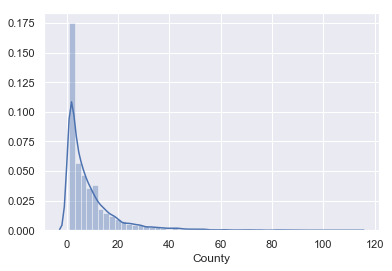

In [129]:
# number of states per provider
county_values = train_all_data.groupby(['Provider', 'County'])['County'].count().groupby('Provider').count()
sns.distplot(county_values)

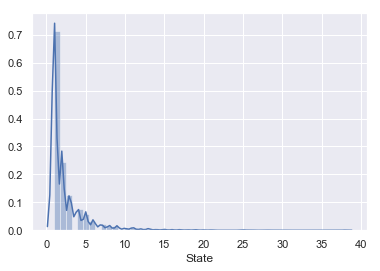

In [130]:
# number of counties per provider
state_values = train_all_data.groupby(['Provider', 'State'])['State'].count().groupby('Provider').count()
sns.distplot(state_values)

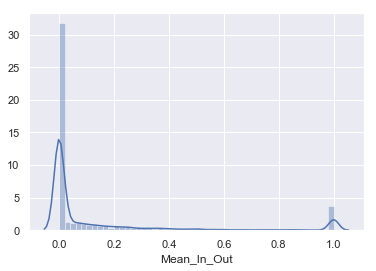

In [131]:
sns.distplot(train_final_data['Mean_In_Out'])

In [118]:
cont_cols = ['Mean_InscClaimAmtReimbursed','Median_InscClaimAmtReimbursed', 'Mean_Age', 'Mean_Duration', 'Mean_In_Out']

# Compare samples with Mann-Whitney U test for difference in distributions
for col in cont_cols:
    data1 =  train_final_data[col][train_final_data['PotentialFraud']==0] 
    data2 =  train_final_data[col][train_final_data['PotentialFraud']==1]
    stat, p = stats.mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print("Fraudulent %s and non-fraudulent %s have the same distribution (fail to reject H0).\n" % (col, col))
    else:
        print("Fraudulent %s and non-fraudulent %s have different distributions (reject H0).\n" % (col, col))
        


Statistics=523864.000, p=0.000
Fraudulent Mean_InscClaimAmtReimbursed and non-fraudulent Mean_InscClaimAmtReimbursed have different distributions (reject H0).

Statistics=740899.500, p=0.000
Fraudulent Median_InscClaimAmtReimbursed and non-fraudulent Median_InscClaimAmtReimbursed have different distributions (reject H0).

Statistics=1229701.500, p=0.371
Fraudulent Mean_Age and non-fraudulent Mean_Age have the same distribution (fail to reject H0).

Statistics=476597.000, p=0.000
Fraudulent Mean_Duration and non-fraudulent Mean_Duration have different distributions (reject H0).

Statistics=553946.000, p=0.000
Fraudulent Mean_In_Out and non-fraudulent Mean_In_Out have different distributions (reject H0).



In [119]:
# Compare with Welch's Independent T test for difference in means        
for col in cont_cols:
    data1 =  train_final_data[col][train_final_data['PotentialFraud']==0] 
    data2 =  train_final_data[col][train_final_data['PotentialFraud']==1]
    stat, p = stats.ttest_ind(data1, data2, equal_var=False)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print("Fraudulent %s and non-fraudulent %s have the same mean (fail to reject H0).\n" % (col, col))
    else:
        print("Fraudulent %s and non-fraudulent %s have different means (reject H0).\n" % (col, col))


Statistics=-13.161, p=0.000
Fraudulent Mean_InscClaimAmtReimbursed and non-fraudulent Mean_InscClaimAmtReimbursed have different means (reject H0).

Statistics=-5.951, p=0.000
Fraudulent Median_InscClaimAmtReimbursed and non-fraudulent Median_InscClaimAmtReimbursed have different means (reject H0).

Statistics=-0.336, p=0.737
Fraudulent Mean_Age and non-fraudulent Mean_Age have the same mean (fail to reject H0).

Statistics=-28.314, p=0.000
Fraudulent Mean_Duration and non-fraudulent Mean_Duration have different means (reject H0).

Statistics=-13.792, p=0.000
Fraudulent Mean_In_Out and non-fraudulent Mean_In_Out have different means (reject H0).

